# Aula 19: reprodução em Python 3

O projeto foi implementado na linguagem Python 3.

Existe uma pequena diferença entre fft() matlab e do python. A do Python solta os valores com uma módulo maior, apenas isso! Em python o sinal é 2750x maior!

# isso eh codigo !!!
# importando arquivos locais para dentro do Collab
from google.colab import files
uploaded = files.upload()

In [1]:
# bibliotecas de computação numérica e manipulação de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal as signal
# usar funcao FFT
# from scipy import fftpack

In [2]:
# vendo arquivo carregado
# ls

In [3]:
from scipy.io import wavfile
# lendo o arquivo de áudio
fs, data = wavfile.read('solo.wav')

In [4]:
# tipo das variaveis
print(type(fs)), print(type(data))

<class 'int'>
<class 'numpy.ndarray'>


(None, None)

In [5]:
# tamanho variaveis
print((fs)), print('\n',len(data))

44100

 274176


(None, None)

In [6]:
# visualizando data
data.shape, print(data[1:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


((274176,), None)

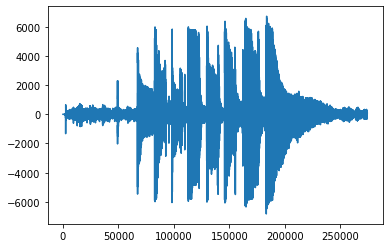

In [7]:
# Preparando os dados e o sistema
sinal = data
Fs = fs
# analisando o Sinal

# Análise no tempo
plt.plot(sinal) 


Abaixo vemos a única diferença foi a escala.

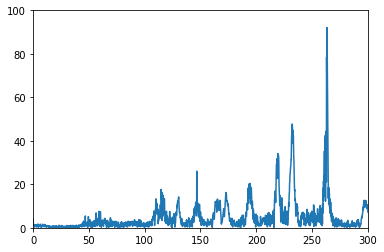

In [8]:
# analise em frequencia
N = len(sinal)
dF = Fs/N
n = np.linspace(1, N, N)
F = n*dF

# faxendo fft
X = np.fft.fft(sinal)
X = 1/N*np.abs(X)

# eixoX = np.linspace(0, 300, len(X))

axes = plt.gca()
axes.set_xlim([0, 300])
axes.set_ylim([0, 100]) # deveria ser [0, 100] no Matlab

plt.plot(F,X)
# biblio
#print(F)

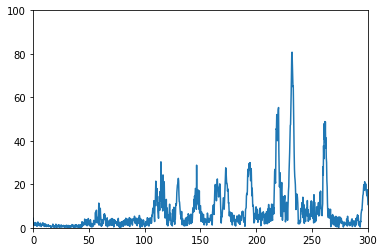

In [9]:
# Identificando a porção temporal onde ocorre o erro (para quem tem o ouvido afinado, consegue identificar que é na sétima nota tocada)
#  NÃO ENTENDI pq ele deixa a última nota de fora da análise
aux = sinal[16000:180000]; 
#aux = sinal(66000:76000);%aux = sinal(82000:92000);aux = sinal(97000:108000);
#aux = sinal(112500:125000);aux = sinal(145000:156000);aux = sinal(182000:240000);
N_aux = len(aux)
dF_aux = Fs/N_aux
n = np.linspace(0, N_aux, N_aux)
#n = 0:1:N_aux-1
F = n*dF_aux
Y = np.fft.fft(aux)
Y = 1/N_aux*np.abs(Y)
 
axes = plt.gca()
axes.set_xlim([0, 300])
axes.set_ylim([0, 100]) # deveria ser [0, 100] no Matlab

plt.plot(F,Y)

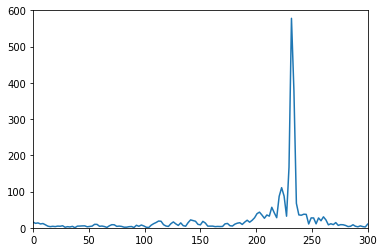

In [10]:
# Identificando a porção temporal onde ocorre o erro (para quem tem o ouvido afinado, consegue identificar que é na sétima nota tocada)
#  NÃO ENTENDI pq ele deixa a última nota de fora da análise
x = sinal[160000:180000]
#aux = sinal(66000:76000);%aux = sinal(82000:92000);aux = sinal(97000:108000);
#aux = sinal(112500:125000);aux = sinal(145000:156000);aux = sinal(182000:240000);
N_x = len(x)
dF_x = Fs/N_x
n = np.linspace(0, N_x, N_x)
#n = 0:1:N_aux-1
F = n*dF_x
Y = np.fft.fft(x)
Y = 1/N_x*np.abs(Y)
 
axes = plt.gca()
axes.set_xlim([0, 300])
axes.set_ylim([0, 600]) # deveria ser [0, 100] no Matlab

plt.plot(F,Y)

In [11]:
# Realizando o expansor
L = 232
M = 247
xe = np.zeros(len(x)*L)

for i in np.arange(len(xe)):
  #print(i, ' e ', L)
  if i == 20e3:
    break
  xe[i*L] = x[i]

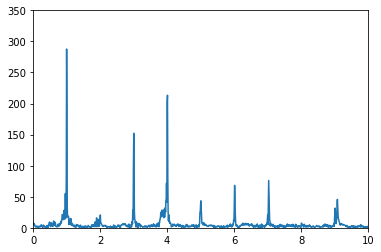

In [12]:
# Realizando a interpolação
# Forma alternativa de gerar o filtro Barlett usando o comando barlett
inter = np.bartlett(L);
# Fazendo a convolução do filtro com o sinal incorreto

# lfilter analogo ao filter do matlab 
from scipy.signal import lfilter

xe2 = lfilter(inter,1,xe);

N_xe2 = len(xe2)
dF_xe2 = Fs/N_xe2
n = np.linspace(0, N_xe2, N_xe2)
#n = 0:1:N_xe2-1;
F = n*dF_xe2
Ye = np.fft.fft(xe2)
Ye = 1/N_xe2*np.abs(Ye)

axes = plt.gca()
axes.set_xlim([0, 10])
axes.set_ylim([0, 350]) # deveria ser [0, 100] no Matlab

plt.plot(F,Ye)

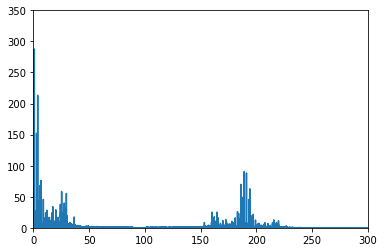

In [13]:
# Filtro Passa-Baixa
# Fazendo o projeto do filtro FIR usando o comando FIR1 e filtrando o sinal xe
fpb = signal.firwin(200,np.pi/M)
# Fazendo a convolução do filtro com o sinal interpolado
xe3 = lfilter(fpb,1,xe2);

# Analisando o espectro do sinal  xe3
N_xe3 = len(xe3);
dF_xe3 = Fs/N_xe3;
n = np.linspace(1, N_xe3, N_xe3)
#n = 1:1:N_xe3;
F = n*dF_xe3;
Y = np.fft.fft(xe3);
Y = 1/N_xe3*np.abs(Y);

axes = plt.gca()
axes.set_xlim([0, 300])
axes.set_ylim([0, 350]) # deveria ser [0, 100] no Matlab

plt.plot(F,Y)

In [14]:

# Realilzando a decimação

x_cor = np.zeros(len(xe/M))

for k in np.arange(len(xe/M)):
  if k*M == 4640142:
    break 
  x_cor[k] = xe3[k*M]

In [36]:
aux = np.transpose(x_cor)
#aux
x_cor

array([ 0.        ,  7.66992581, -1.1785702 , ...,  0.        ,
        0.        ,  0.        ])

In [17]:
y = sinal[0:159999-1];



TypeError: 'type' object is not subscriptable

In [16]:
# Reconstrução do sinal

y = sinal[0:159999-1];

x_corT = np.matrix[1][len(xe/M)]

x_corT = np.array(x_cor).T;
y = [y;x_cor];
y = [y;sinal(180000+1:end)];
som_final=audioplayer(y,Fs);
play(som_final)

# Analisando o espectro do sinal  reconstruído
N_y = len(y);
dF_y = Fs/N_y;
n = np.linspace(1, N_y, N_y)
#n = 1:1:N_y;
F = n*dF_y;
Y = np.fft.fft(y);
Y = 1/N_ynp.*abs(Y);
#figure
axes = plt.gca()
axes.set_xlim([0, 300])
axes.set_ylim([0, 600])
np.plot(F,Y)


SyntaxError: invalid syntax (<ipython-input-16-2b4c3224fe25>, line 8)

In [ ]:
np.pi

In [ ]:
inter = np.bartlett(L);
(inter)

In [ ]:
len(xe)

In [ ]:
xe[4640000-1]

In [ ]:
aux

In [ ]:
# frequencia de amostragem
sample_freq = fftpack.fftfreq(sinal.size, d=1/Fs) 
sig_fft = fftpack.fft(sinal)

sample_freq


In [ ]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

In [ ]:
plt.figure()
plt.plot(freqs, power)
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Energia')
axes = plt.axes([0.3, 0.3, 0.5, 0.5])
plt.title('Pico de frequencia')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

In [ ]:
# tentando outro metodo
# data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
# data = data * np.hanning(len(data)) # smooth the FFT by windowing data
fft = abs(np.fft.fft(sinal).real)
fft = fft[:int(len(fft)/2)] # keep only first half
freq = np.fft.fftfreq(N,1.0/Fs)
freq = freq[:int(len(freq)/2)] # keep only first half
freqPeak = freq[np.where(fft==np.max(fft))[0][0]]+1

In [ ]:
aux = X = 1/N*np.abs(fft)
plt.plot(freq, aux)

In [ ]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

In [ ]:
x